In [3]:
import pandas as pd


code to know which feature the most important in the csv file

In [4]:
# Specify the path to your CSV file
file_path = "puf2022_processed.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# View the DataFrame (optional)
print(df)

       WEIGHT  STATUS  FINALDEST  FOOTINGS  LEASE  LOCATION  REGION  PIERS  \
0     69.1571       2          1         3      2         1       3      1   
1     69.1571       2          1         3      2         2       3      1   
2     69.1571       2          1         3      2         3       3      1   
3     18.5789       2          1         3      2         2       4      1   
4     18.5789       2          1         4      2         1       4      3   
...       ...     ...        ...       ...    ...       ...     ...    ...   
7018   8.0368       3          9         9      9         9       5      9   
7019  21.2679       3          9         9      9         9       5      9   
7020  21.2679       3          9         9      9         9       5      9   
7021   5.9000       3          9         9      9         9       5      9   
7022   5.9000       3          9         9      9         9       5      9   

      SECURED  TITLED  ...  jprice  jsqft  jbedroom  jlease  jf

In [8]:
# Get column names
column_names = df.columns.tolist()

# Get column types
column_types = df.dtypes.to_dict()
# Print column names and types
for col_name, col_type in zip(column_names, column_types.values()):
    print(f"Column name: {col_name}, Column type: {col_type}")

Column name: WEIGHT, Column type: float64
Column name: STATUS, Column type: int64
Column name: FINALDEST, Column type: int64
Column name: FOOTINGS, Column type: int64
Column name: LEASE, Column type: int64
Column name: LOCATION, Column type: int64
Column name: REGION, Column type: int64
Column name: PIERS, Column type: int64
Column name: SECURED, Column type: int64
Column name: TITLED, Column type: int64
Column name: SECTIONS, Column type: int64
Column name: PRICE, Column type: int64
Column name: SQFT, Column type: int64
Column name: BEDROOMS, Column type: int64
Column name: SHIPMONTH, Column type: int64
Column name: WGTADJ, Column type: float64
Column name: jstatus, Column type: int64
Column name: jprice, Column type: int64
Column name: jsqft, Column type: int64
Column name: jbedroom, Column type: int64
Column name: jlease, Column type: int64
Column name: jfinaldest, Column type: int64
Column name: jtitle, Column type: int64
Column name: jsecured, Column type: int64
Column name: jloca

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into predictors (X) and target (y)
X = df.drop(columns=['PRICE'])
y = df['PRICE']

# Create a new random forest classifier
model = RandomForestClassifier()

# Fit the model to the data
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Print the feature importances
for i, importance in enumerate(importances):
    print(f'Feature {i}: {importance:.3f}')

# Get the names of the features
feature_names = X.columns

# Get the indices of the most important features
important_indices = importances.argsort()[::-1][:10]

# Get the names of the most important features
important_features = feature_names[important_indices]

# Print the names of the most important features
print('The most important features are:')
for feature in important_features:
    print(f'- {feature}')

Feature 0: 0.100
Feature 1: 0.038
Feature 2: 0.030
Feature 3: 0.028
Feature 4: 0.039
Feature 5: 0.029
Feature 6: 0.040
Feature 7: 0.017
Feature 8: 0.020
Feature 9: 0.027
Feature 10: 0.013
Feature 11: 0.222
Feature 12: 0.042
Feature 13: 0.072
Feature 14: 0.075
Feature 15: 0.005
Feature 16: 0.098
Feature 17: 0.017
Feature 18: 0.030
Feature 19: 0.012
Feature 20: 0.018
Feature 21: 0.007
Feature 22: 0.005
Feature 23: 0.006
Feature 24: 0.005
Feature 25: 0.006
The most important features are:
- SQFT
- WEIGHT
- jprice
- WGTADJ
- SHIPMONTH
- BEDROOMS
- REGION
- LEASE
- STATUS
- FINALDEST


In [10]:
from sklearn.feature_selection import SelectKBest, chi2


# Split the data into predictors (X) and target (y)
X = df.drop(columns=['PRICE'])
y = df['PRICE']

# Create a new selector
selector = SelectKBest(chi2, k=10)

# Select the top 10 features
X_selected = selector.fit_transform(X, y)

# Get the feature scores
scores = selector.scores_

# Get the names of the features
feature_names = X.columns

# Get the indices of the most important features
important_indices = scores.argsort()[::-1][:10]

# Get the names of the most important features
important_features = feature_names[important_indices]

# Print the names of the most important features
print('The most important features are:')
for feature in important_features:
    print(f'- {feature}')

The most important features are:
- SQFT
- WEIGHT
- FINALDEST
- LEASE
- BEDROOMS
- SECURED
- PIERS
- TITLED
- LOCATION
- FOOTINGS


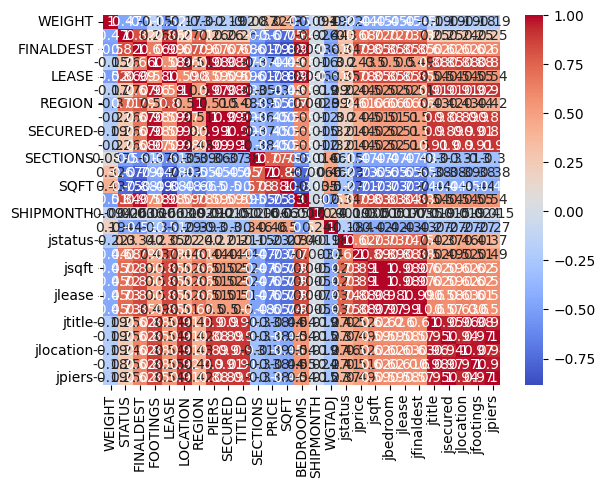

The most important features are:
- PRICE
- SQFT
- FINALDEST
- LEASE
- SECTIONS
- BEDROOMS
- jprice
- STATUS
- jfinaldest
- jlease


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Get the names of the features
feature_names = df.columns

# Get the indices of the most important features
important_indices = corr_matrix['PRICE'].abs().argsort()[::-1][:10]

# Get the names of the most important features
important_features = feature_names[important_indices]

# Print the names of the most important features
print('The most important features are:')
for feature in important_features:
    print(f'- {feature}')

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Split the data into predictors (X) and target (y)
X = df.drop(columns=['PRICE'])
y = df['PRICE']

# Create a new logistic regression model
model = LogisticRegression()

# Create a new RFE selector
rfe = RFE(model, n_features_to_select=10)

# Select the top 10 features
X_selected = rfe.fit_transform(X, y)

# Get the names of the features
feature_names = X.columns

# Get the indices of the most important features
important_indices = rfe.get_support(indices=True)

# Get the names of the most important features
important_features = feature_names[important_indices]

# Print the names of the most important features
print('The most important features are:')
for feature in important_features:
    print(f'- {feature}')

c:\Users\theam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\theam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

The most important features are:
- WEIGHT
- FINALDEST
- LEASE
- LOCATION
- PIERS
- SECURED
- TITLED
- SQFT
- BEDROOMS
- SHIPMONTH


c:\Users\theam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:

from sklearn.ensemble import RandomForestClassifier

# Split the data into predictors (X) and target (y)
X = df.drop(columns=['PRICE'])
y = df['PRICE']

# Create a new random forest classifier
model = RandomForestClassifier()

# Fit the model to the data
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Get the indices of the most important features
important_indices = importances.argsort()[::-1][:10]

# Get the names of the most important features
important_features = feature_names[important_indices]

# Print the names of the most important features
print('The most important features are:')
for feature in important_features:
    print(f'- {feature}')

The most important features are:
- SQFT
- jprice
- WEIGHT
- WGTADJ
- SHIPMONTH
- BEDROOMS
- REGION
- STATUS
- jbedroom
- LEASE


In [14]:

from sklearn.decomposition import PCA

# Split the data into predictors (X) and target (y)
X = df.drop(columns=['PRICE'])
y = df['PRICE']

# Create a new PCA model
pca = PCA(n_components=10)

# Reduce the dimensionality of the data
X_reduced = pca.fit_transform(X)

# Get the feature scores
scores = pca.explained_variance_ratio_

# Get the names of the features
feature_names = X.columns

# Get the indices of the most important features
important_indices = scores.argsort()[::-1][:10]

# Get the names of the most important features
important_features = feature_names[important_indices]

# Print the names of the most important features
print('The most important features are:')
for feature in important_features:
    print(f'- {feature}')

The most important features are:
- WEIGHT
- STATUS
- FINALDEST
- FOOTINGS
- LEASE
- LOCATION
- REGION
- PIERS
- SECURED
- TITLED


Column    /     Name	Frequency
WEIGHT	            6
SQFT	             5
FINALDEST	        5
LEASE	              5
BEDROOMS	         5
STATUS	              4
REGION	             3
TITLED	             3
SECURED	             3
LOCATION	           3
PIERS	             3
jprice	                2
WGTADJ	             2
SHIPMONTH	           2
SECTIONS	           1
jfinaldest	          1
jlease               	1
FOOTINGS	          1
jbedroom	           1
PRICE	              1

chossee this column only 
WEIGHT	            6
SQFT	             5
FINALDEST	        5
LEASE	              5
BEDROOMS	         5
STATUS	              4
REGION	             3
TITLED	             3
SECURED	             3
LOCATION	           3
PIERS	             3